## BDA 개요


### 1. 데이터 출처
*   대한민국 대기환경 지역별 월별 데이터 (2023년)
*   https://www.airkorea.or.kr/web/last_amb_hour_data?pMENU_NO=123, 한국환경공단(에어코리아)

### 2. 데이터 구성 변수
1.   지역
2.   망
3.   측정소코드
4.   측정소명
5.   측정일시
6.   SO2: 황산화물, 주로 화석 연료의 연소에서 발생
7.   CO : 주로 연료의 불완전 연소로 발생
8.   O3 : 대기 중에서 자외선에 의해 생성되는 가스
9.   NO2 : 자동차 배기가스와 산업 공정에서 발생
10.   PM10  : 미세먼지, 지름이 10μm 이하인 입자
11.   PM25 : 미세먼지, 2.5μm 이하인 입자
12.   주소

### 3. 분석 주제: 무엇을 할 것인가?
- 기본 주제 : **지역별 월별 도시대기 분석 및 시각화**
- 구체적인 분석 주제 및 질문
1. 지역별 월별 평균 미세먼지 농도 분석
2. 미세먼지 농도가 가장 높은 지역과 낮은 지역 분석
2. 도시대기와 관련하여 '점 오염원'과 '이동 오염원'에 따른 대기질 분석

* ※2회 이상 반복 작업할 필요가 없거나 오래 걸리는 셀 항목은 주석처리하였고 직접적인 출력결과가 아닌 항목은 [숨기기] 처리하였습니다.*

## 데이터셋 불러오기 & CSV 변환

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os

In [3]:
'''
!pip install openpyxl
'''

'\n!pip install openpyxl\n'

In [4]:
'''
# 폴더 내의 xlsx 파일을 전부 csv로 변환하는 함수

def convert_xlsx_to_csv(folder_path):
    # 폴더 내의 모든 파일을 확인
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.xlsx'):
            # 파일 경로 생성
            xlsx_file_path = os.path.join(folder_path, file_name)
            # CSV 파일 이름 생성
            csv_file_name = file_name.replace('.xlsx', '.csv')
            csv_file_path = os.path.join(folder_path, csv_file_name)

            # Excel 파일 읽기
            df = pd.read_excel(xlsx_file_path, engine='openpyxl')
            # CSV 파일로 저장
            df.to_csv(csv_file_path, index=False)
            print(f'Converted {file_name} to {csv_file_name}')

# 함수 호출
folder_path = '/content/drive/MyDrive/BDA/2023'
convert_xlsx_to_csv(folder_path)
'''

"\n# 폴더 내의 xlsx 파일을 전부 csv로 변환하는 함수\n\ndef convert_xlsx_to_csv(folder_path):\n    # 폴더 내의 모든 파일을 확인\n    for file_name in os.listdir(folder_path):\n        if file_name.endswith('.xlsx'):\n            # 파일 경로 생성\n            xlsx_file_path = os.path.join(folder_path, file_name)\n            # CSV 파일 이름 생성\n            csv_file_name = file_name.replace('.xlsx', '.csv')\n            csv_file_path = os.path.join(folder_path, csv_file_name)\n\n            # Excel 파일 읽기\n            df = pd.read_excel(xlsx_file_path, engine='openpyxl')\n            # CSV 파일로 저장\n            df.to_csv(csv_file_path, index=False)\n            print(f'Converted {file_name} to {csv_file_name}')\n\n# 함수 호출\nfolder_path = '/content/drive/MyDrive/BDA/2023'\nconvert_xlsx_to_csv(folder_path)\n"

In [5]:
#CSV 파일 읽기 및 데이터프레임으로 합치기

def read_csv_files(folder_path):
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    dataframes = []

    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        dataframes.append(df)

    # 모든 데이터프레임을 하나로 합치기
    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

# 함수 호출
folder_path = '/content/drive/MyDrive/BDA/2023'
df = read_csv_files(folder_path)

# 결과 출력
df.tail()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
5667284,인천 옹진군,국가배경농도,831495,울도,2023123120,0.0010,0.73,0.0415,0.0086,64.0,57.0,인천 옹진군 덕적면 울도리 85번지
5667285,인천 옹진군,국가배경농도,831495,울도,2023123121,0.0013,0.73,0.0409,0.0095,62.0,50.0,인천 옹진군 덕적면 울도리 85번지
5667286,인천 옹진군,국가배경농도,831495,울도,2023123122,0.0014,0.77,0.0414,0.0111,65.0,59.0,인천 옹진군 덕적면 울도리 85번지
5667287,인천 옹진군,국가배경농도,831495,울도,2023123123,0.0013,0.71,0.0411,0.0112,63.0,54.0,인천 옹진군 덕적면 울도리 85번지
5667288,인천 옹진군,국가배경농도,831495,울도,2023123124,0.0015,0.74,0.0402,0.0098,67.0,59.0,인천 옹진군 덕적면 울도리 85번지


## 데이터 전처리

In [6]:
# 전처리 작업 전 데이터 타입 & 사이즈 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667289 entries, 0 to 5667288
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   지역      object 
 1   망       object 
 2   측정소코드   int64  
 3   측정소명    object 
 4   측정일시    int64  
 5   SO2     float64
 6   CO      float64
 7   O3      float64
 8   NO2     float64
 9   PM10    float64
 10  PM25    float64
 11  주소      object 
dtypes: float64(6), int64(2), object(4)
memory usage: 518.9+ MB


### Missing Value 확인

In [7]:
!pip install missingno

In [8]:
import missingno as msno
import matplotlib.pyplot as plt

In [9]:
# matplot 한글 깨짐 문제
# 해결방법 출처: https://mydevjourney.tistory.com/12
import matplotlib.font_manager as fm

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 123633 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


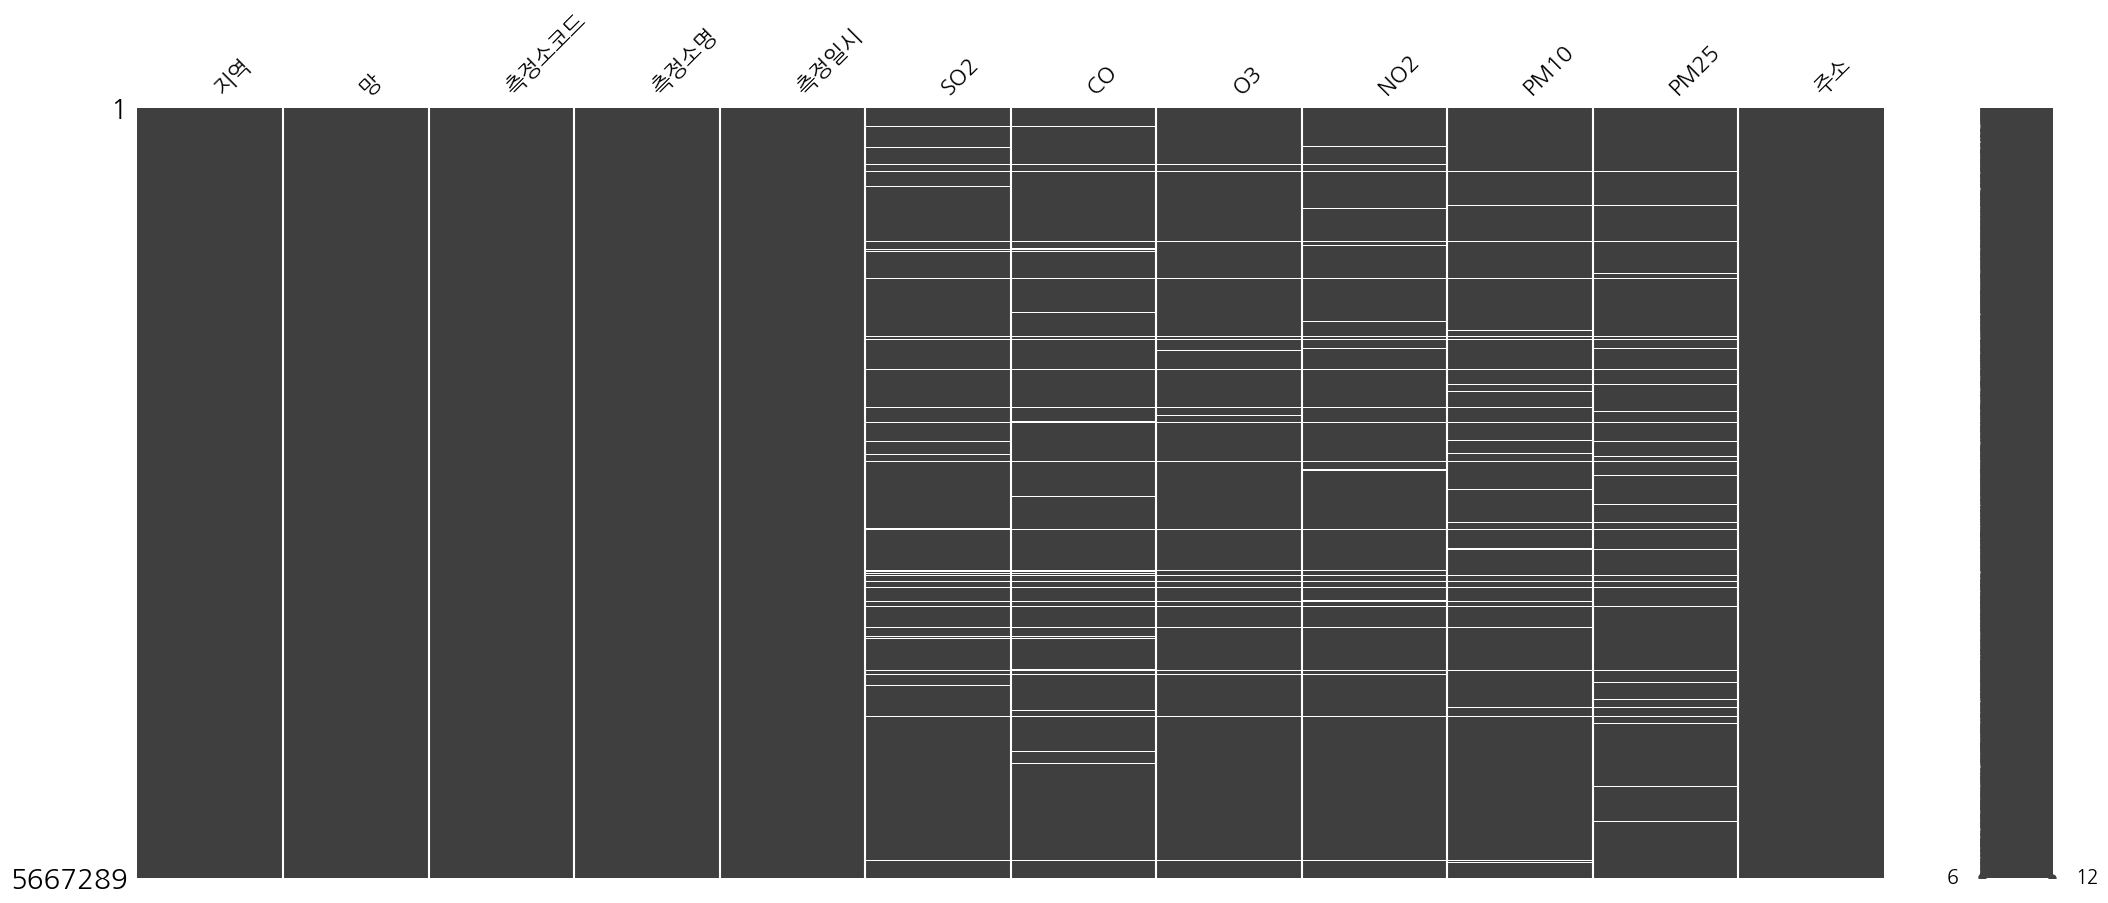

In [10]:
# matrix로 결측치 시각화
msno.matrix(df)
plt.show()

In [11]:
# 수치적으로 정확한 결측치 확인

# 결측치 개수
na_counts = df.isna().sum()
#print(na_counts)

# 전체 데이터의 행 수
total_rows = len(df)

# 결측치 비율 계산
missing_percentage = (na_counts / total_rows) * 100

# 결과 출력
print(missing_percentage)

지역       0.000000
망        0.000000
측정소코드    0.000000
측정소명     0.000000
측정일시     0.000000
SO2      4.614834
CO       4.861884
O3       3.643594
NO2      4.049396
PM10     4.421567
PM25     5.010262
주소       0.000000
dtype: float64


### *Missing Value를 dropna로 삭제해도 될까?
- 확인해보니 missing value 비율이 가장 큰 칼럼의 경우 전체 데이터셋의 크기에 대하여 5.01%의 결측치를 갖고 있는 것으로 확인되었다.
- 이 경우, 결측치가 무작위로 발생하는 경우라면, 5% 정도의 결측치를 삭제해도 큰 문제가 되지 않을 수 있다.
- missing value 문제로 인하여 월별, 지역별 상관 관계를 분석할 필요까진 없다고 생각되어, column 삭제의 방식으로 처리하였다.
- *나중에 시간 되면 여기를 보충할 수 있을 것 같음*

In [12]:
# dropna로 결측치 삭제
df = df.dropna().reset_index(drop=True)
df.tail()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
5062839,인천 옹진군,국가배경농도,831495,울도,2023123120,0.0010,0.73,0.0415,0.0086,64.0,57.0,인천 옹진군 덕적면 울도리 85번지
5062840,인천 옹진군,국가배경농도,831495,울도,2023123121,0.0013,0.73,0.0409,0.0095,62.0,50.0,인천 옹진군 덕적면 울도리 85번지
5062841,인천 옹진군,국가배경농도,831495,울도,2023123122,0.0014,0.77,0.0414,0.0111,65.0,59.0,인천 옹진군 덕적면 울도리 85번지
5062842,인천 옹진군,국가배경농도,831495,울도,2023123123,0.0013,0.71,0.0411,0.0112,63.0,54.0,인천 옹진군 덕적면 울도리 85번지
5062843,인천 옹진군,국가배경농도,831495,울도,2023123124,0.0015,0.74,0.0402,0.0098,67.0,59.0,인천 옹진군 덕적면 울도리 85번지


### 데이터 필터링: 도시대기

In [13]:
# 도시대기를 제외한 다른 value 확인
print(df['망'].unique())

# '망' column이 '도시대기'인 row만 남기기
df = df[df['망'] == '도시대기']

# 확인
print(df['망'].unique())

['도시대기' '도로변대기' '교외대기' '항만' '국가배경농도']
['도시대기']


### 데이터 필터링: 지역명에서 지역과 지구(자치구) 분리

In [14]:
# '지역' column을 분리하여 '지역'과 '지구' column 생성
df[['지역', '지구']] = df['지역'].str.split(' ', n=1, expand=True)

# '지구' 칼럼을 '지역' 칼럼 오른쪽으로 이동
cols = list(df.columns)
cols.insert(cols.index('지역') + 1, cols.pop(cols.index('지구')))
df = df[cols]
df.head()

,지역,지구,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울,중구,도시대기,111121,중구,2023010101,0.004,0.8,0.004,0.055,57.0,52.0,서울 중구 덕수궁길 15
1,서울,중구,도시대기,111121,중구,2023010102,0.004,0.8,0.004,0.051,65.0,60.0,서울 중구 덕수궁길 15
2,서울,중구,도시대기,111121,중구,2023010103,0.004,0.8,0.005,0.048,73.0,63.0,서울 중구 덕수궁길 15
3,서울,중구,도시대기,111121,중구,2023010104,0.004,0.7,0.014,0.032,76.0,71.0,서울 중구 덕수궁길 15
4,서울,중구,도시대기,111121,중구,2023010105,0.004,0.7,0.021,0.021,78.0,73.0,서울 중구 덕수궁길 15


### 측정일시를 datetime 객체로 변환


In [15]:
# '측정일시'를 datetime으로 변환하는 함수
def convert_to_datetime(value):
    value = str(value)  # 정수를 문자열로 변환
    year = int(value[:4])
    month = int(value[4:6])
    day = int(value[6:8])
    hour = int(value[8:10])
    if hour == 24:
        hour = 0
        day += 1
        # 월말 조정
        if day > pd.Timestamp(year, month, 1).days_in_month:
            day = 1
            month += 1
            # 연말 조정
            if month > 12:
                month = 1
                year += 1
    return pd.Timestamp(year, month, day, hour)

# 함수 적용
df['측정일시'] = df['측정일시'].apply(convert_to_datetime)

# 적용 사항 확인
df.head()

,지역,지구,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울,중구,도시대기,111121,중구,2023-01-01 01:00:00,0.004,0.8,0.004,0.055,57.0,52.0,서울 중구 덕수궁길 15
1,서울,중구,도시대기,111121,중구,2023-01-01 02:00:00,0.004,0.8,0.004,0.051,65.0,60.0,서울 중구 덕수궁길 15
2,서울,중구,도시대기,111121,중구,2023-01-01 03:00:00,0.004,0.8,0.005,0.048,73.0,63.0,서울 중구 덕수궁길 15
3,서울,중구,도시대기,111121,중구,2023-01-01 04:00:00,0.004,0.7,0.014,0.032,76.0,71.0,서울 중구 덕수궁길 15
4,서울,중구,도시대기,111121,중구,2023-01-01 05:00:00,0.004,0.7,0.021,0.021,78.0,73.0,서울 중구 덕수궁길 15


## 데이터 분석 및 시각화

### 지역별 월별 평균 미세먼지 (PM25, PM10) 농도 with Timeplot
- Timeplot: 월별 미세먼지 농도의 변화를 시각화하여 계절별 패턴을 파악
- **분석 결과**
  - PM10의 경우 모든 지역에서 3-4월에 고점이었고, 8-9월에 저점이었다.
  - PM25의 경우 모든 지역에서 2-3월에 고점이었고, 8-9월에 저점이었다.

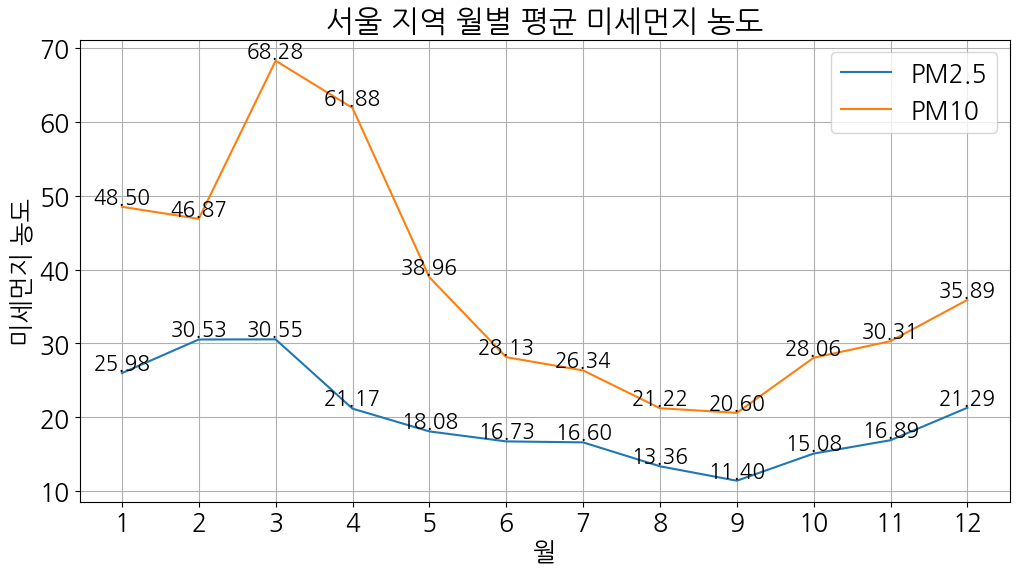

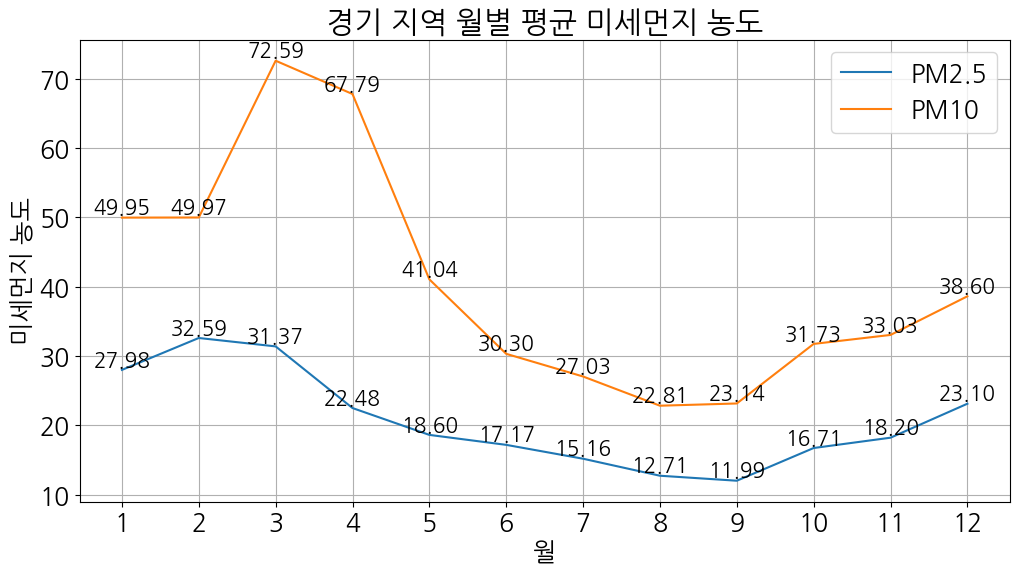

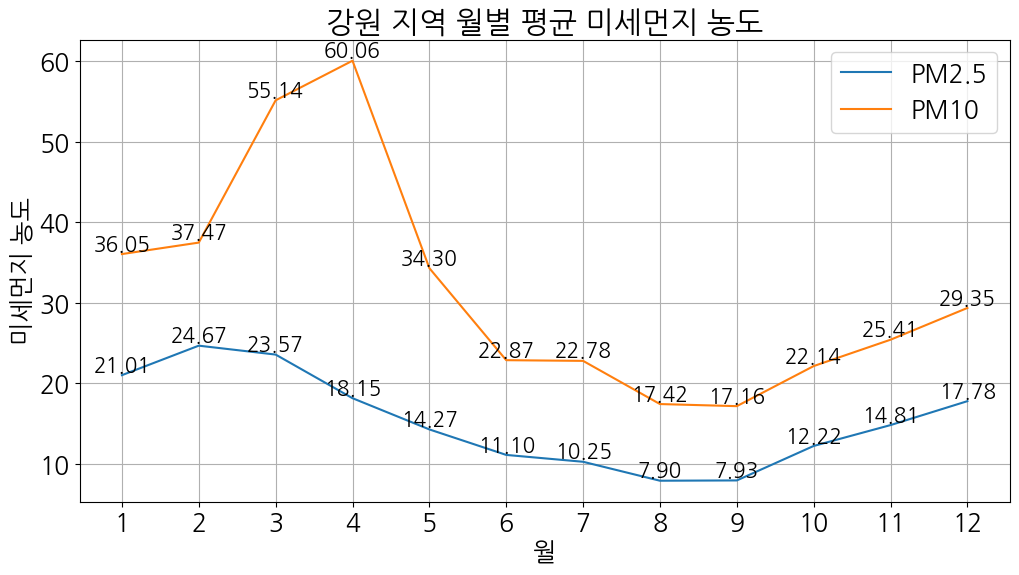

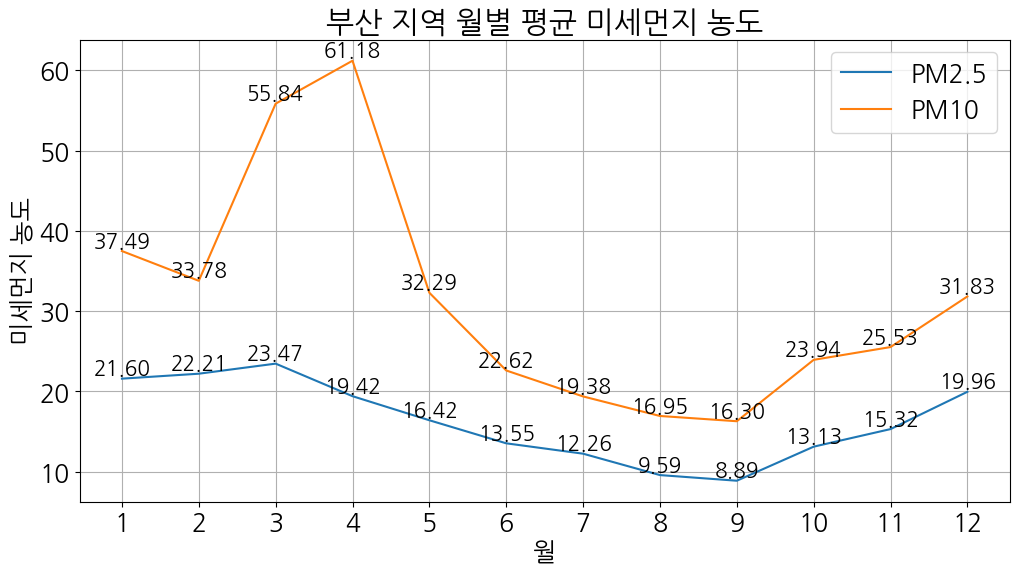

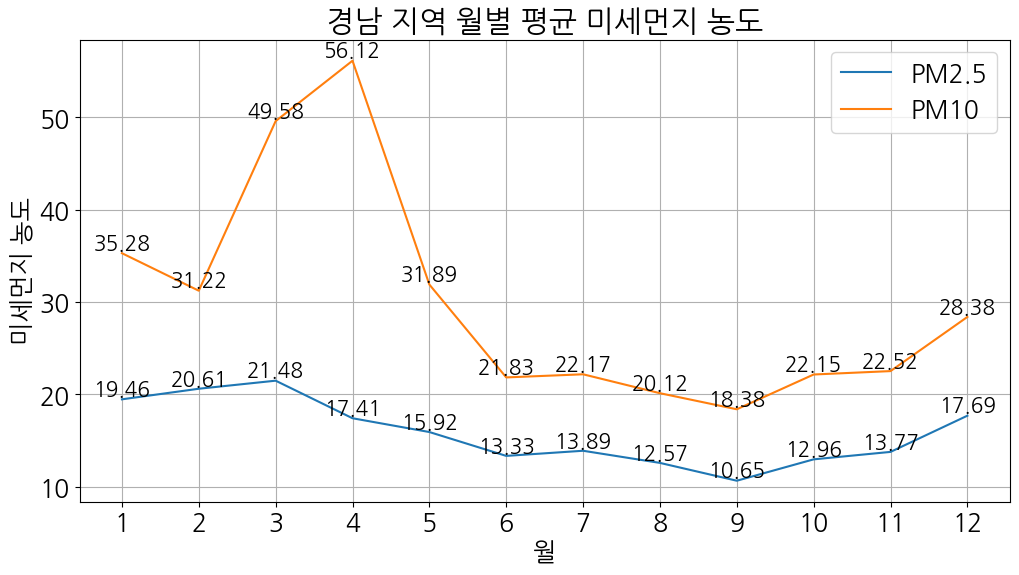

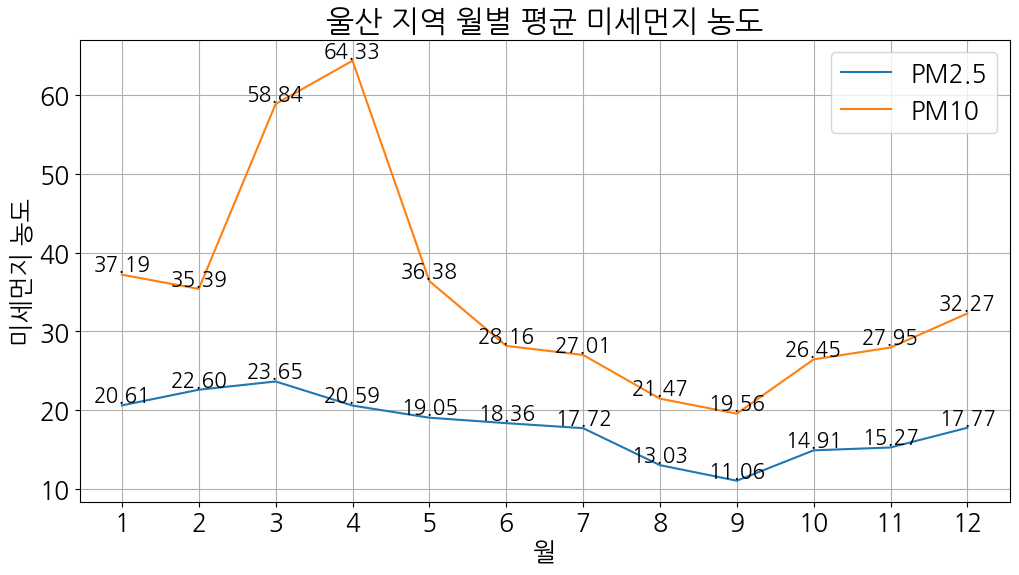

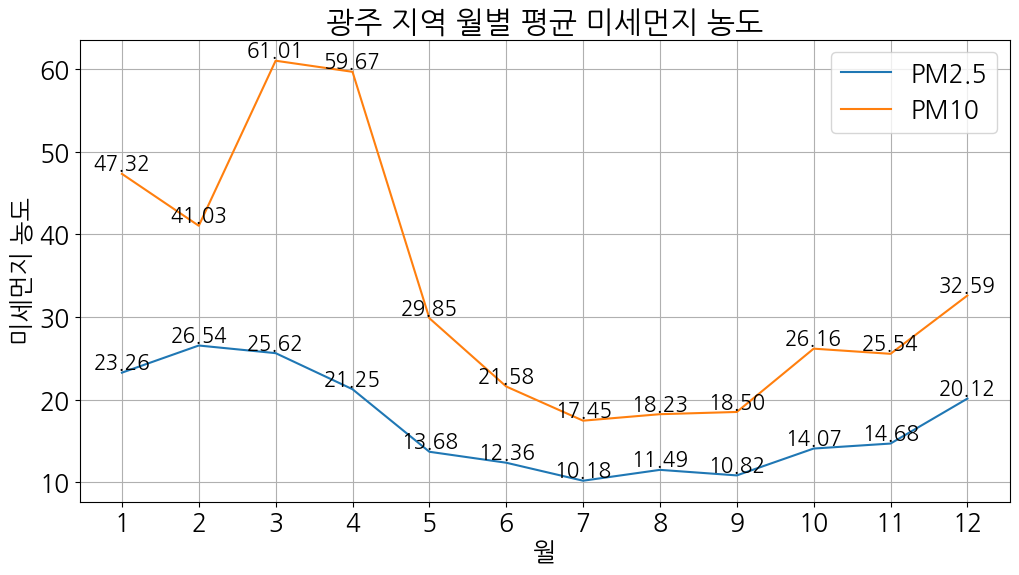

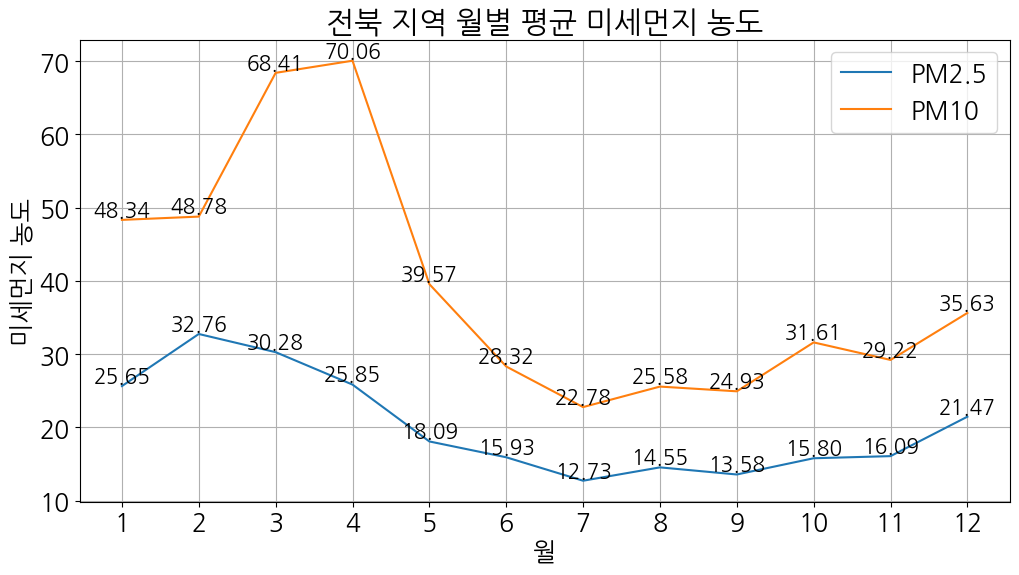

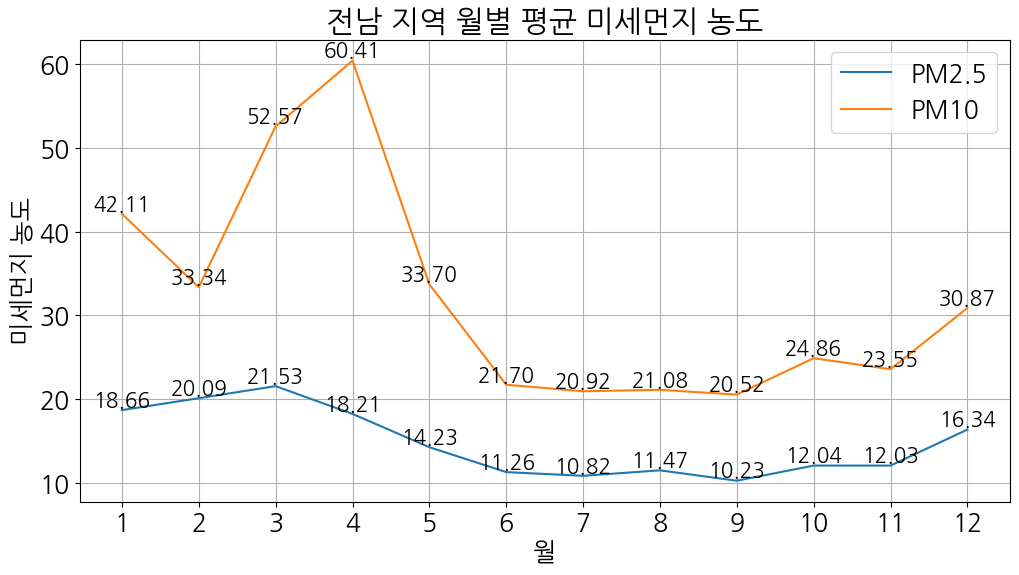

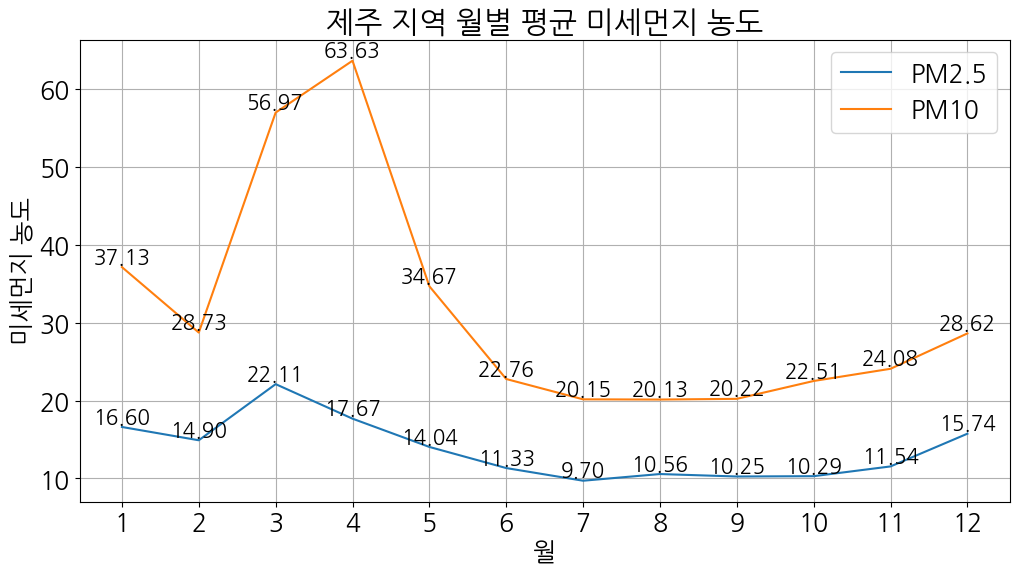

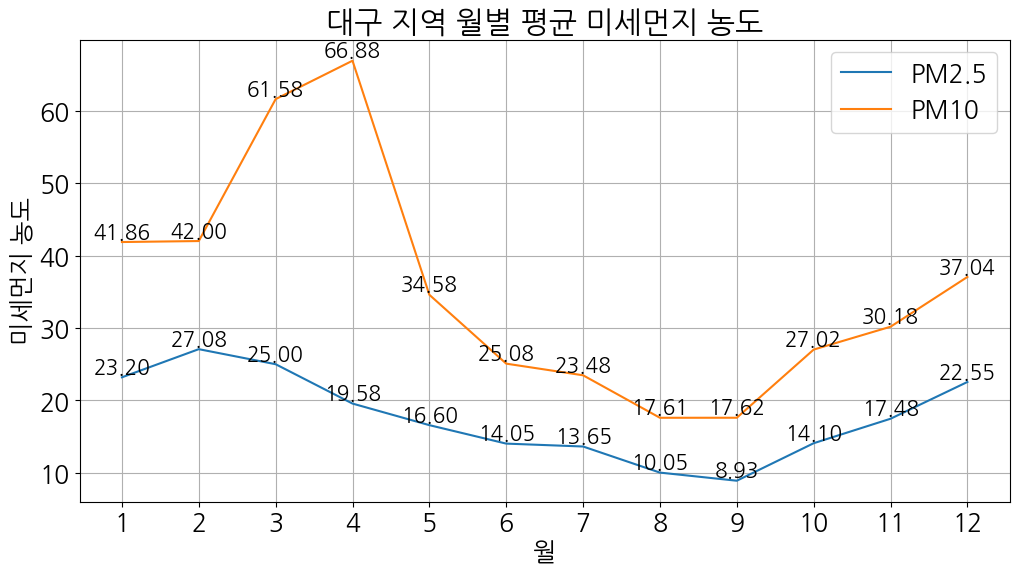

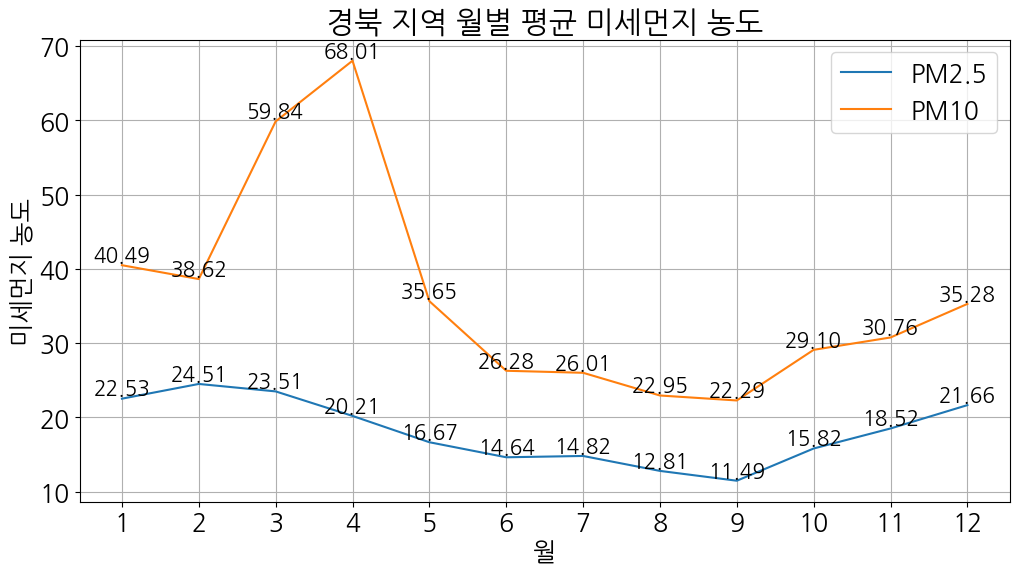

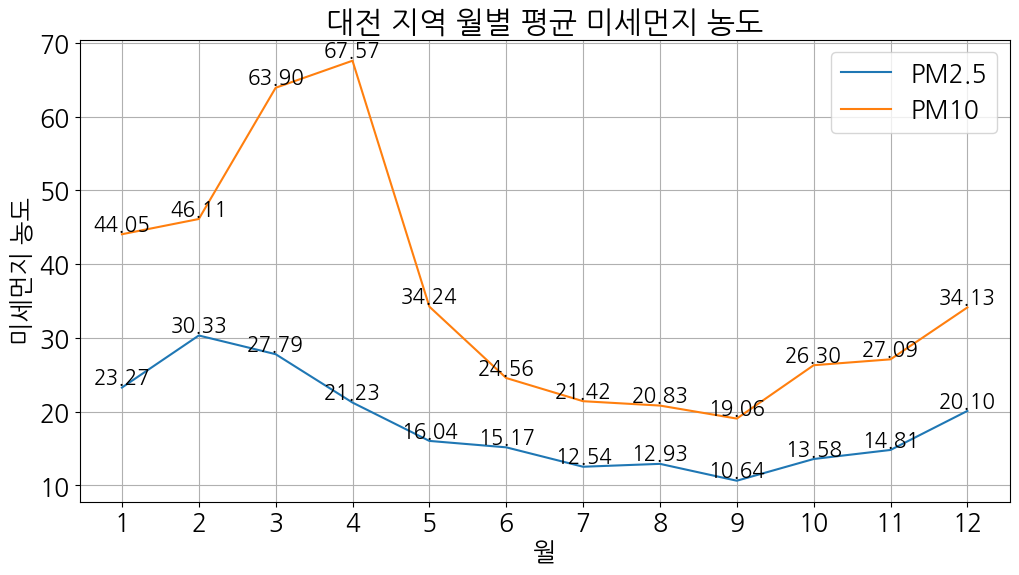

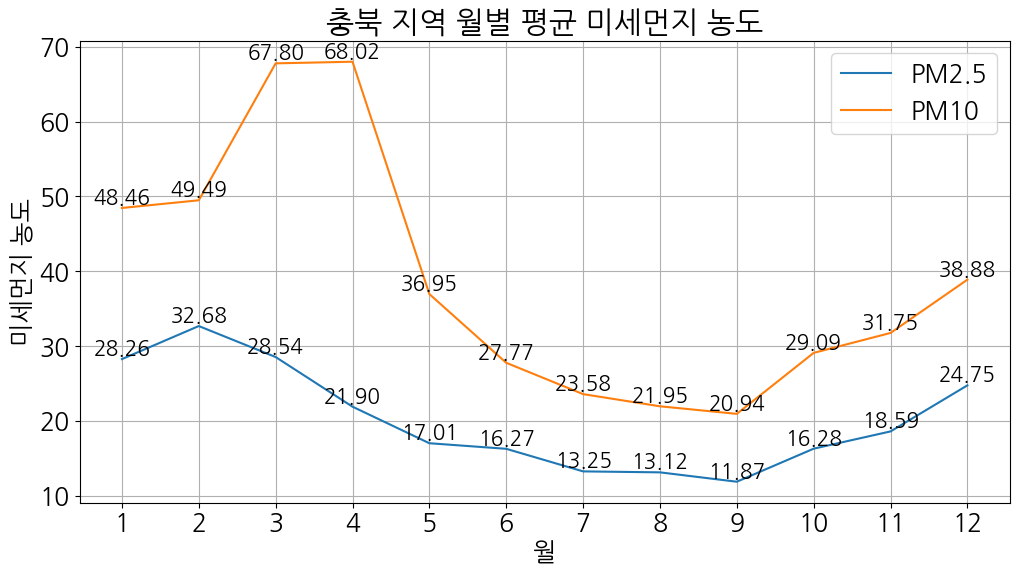

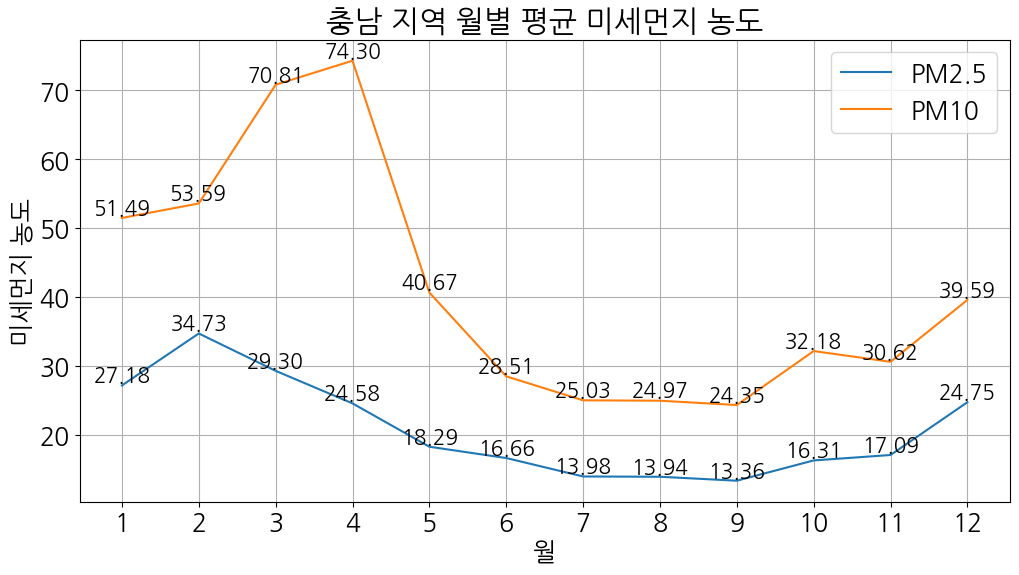

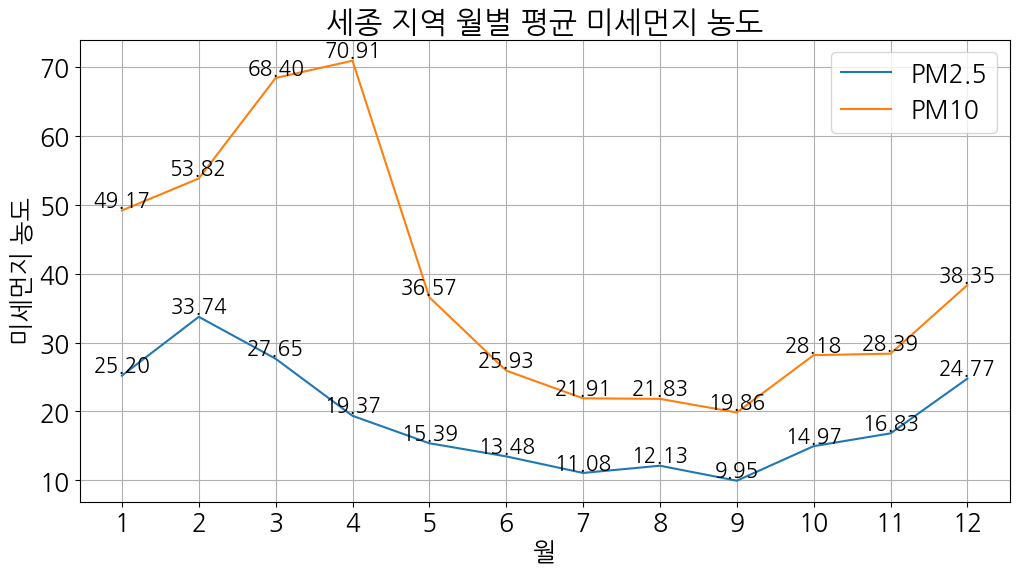

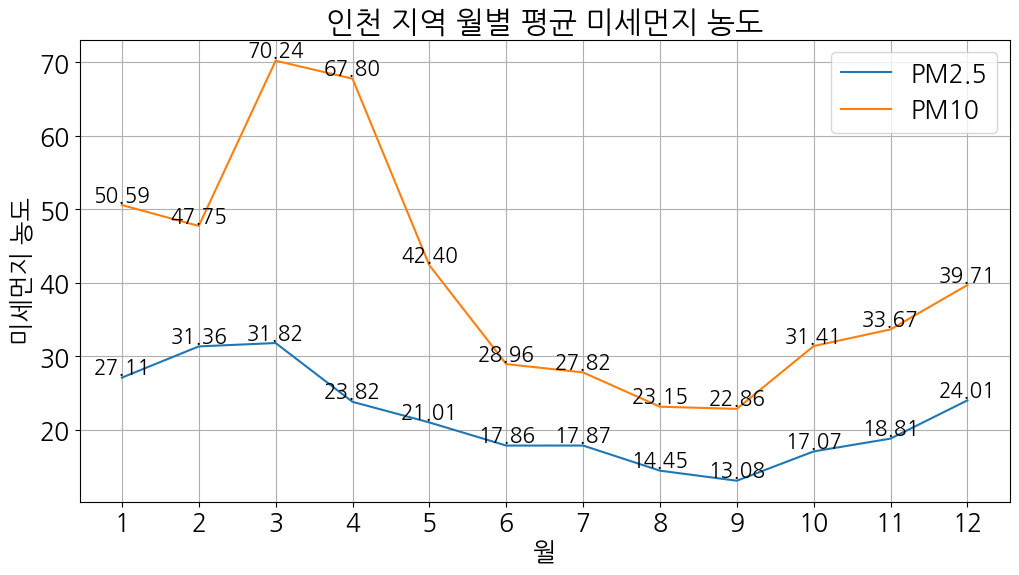

In [16]:
# 특정 지역의 데이터를 처리하고 Timeplot을 시각화하는 함수
def plot_timeplot_for_region(df, region):
    # 지정된 지역의 데이터 추출
    region_df = df[df['지역'] == region].copy()

    # 월별 데이터 추출
    region_df['월'] = region_df['측정일시'].dt.month

    # 월별 PM2.5 및 PM10 농도 평균 계산
    monthly_avg = region_df.groupby('월')[['PM25', 'PM10']].mean()

    # Timeplot 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_avg.index, monthly_avg['PM25'], label='PM2.5')
    plt.plot(monthly_avg.index, monthly_avg['PM10'], label='PM10')

    # 월별 수치 추가
    for i in range(len(monthly_avg)):
        plt.text(monthly_avg.index[i], monthly_avg['PM25'].iloc[i], f'{monthly_avg["PM25"].iloc[i]:.2f}', ha='center', va='bottom', fontsize='small')
        plt.text(monthly_avg.index[i], monthly_avg['PM10'].iloc[i], f'{monthly_avg["PM10"].iloc[i]:.2f}', ha='center', va='bottom', fontsize='small')

    # x축 눈금을 1부터 12까지로 설정
    plt.xticks(ticks=range(1, 13), labels=range(1, 13))

    plt.xlabel('월')
    plt.ylabel('미세먼지 농도')
    plt.title(f'{region} 지역 월별 평균 미세먼지 농도')
    plt.legend()
    plt.grid(True)
    plt.show()

# 지역 목록 추출
regions = df['지역'].unique()

# 각 지역에 대해 Timeplot 시각화
for region in regions:
    plot_timeplot_for_region(df, region)

### 지역별 월별 평균 미세먼지 (PM25, PM10) 농도 with Heatmap(Trendlevel)
- Timeplot은 계절상(월별)의 흐름을 개괄적으로 확인하기에 적합했지만, 지역별 분석을 하기에 어려움이 있었다.
- Heatmap으로 지역의 차이에 포커스를 맞춰 확인하였다.
- **분석 결과(PM25)**
  - 경남, 전남, 부산의 경우 타지역에 비해서 PM25 농도가 낮았다.
  - 특히 2월의 충남은 34.7로 2023년 모든 지역에서 가장 PM25 농도가 높았는데,
  - 2월의 제주는 14.9로 2023년 모든 지역에서 가장 PM25 농도가 낮았다.

- **분석 결과 (PM10)**
 - 한편, 모든 지역에서 3-4월에 가장 농도가 짙었던 PM10의 경우, 지역에 따른 차이가 크지 않았다.

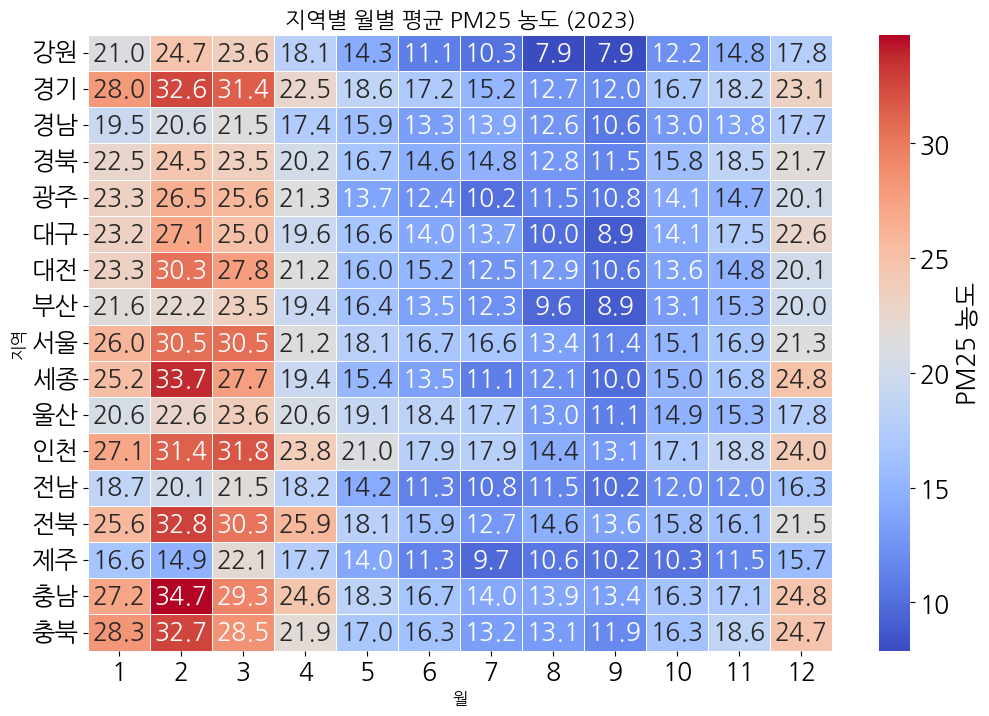

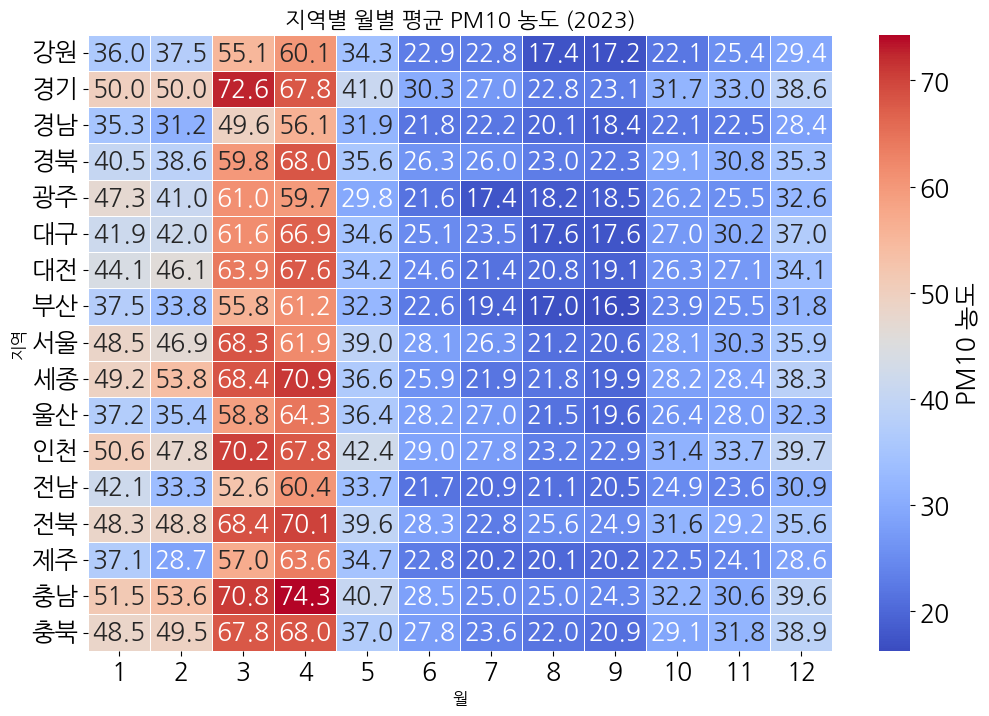

In [17]:
import seaborn as sns

# 지역별 월별 미세먼지 시각화 (Heatmap)
def plot_heatmap_trends(df, value_col, region_col='지역', date_col='측정일시'):

    # 월 추출
    df['월'] = pd.to_datetime(df['측정일시']).dt.month

    # 지역별 월별 평균 계산
    pivot_table = df.pivot_table(
        index=region_col,
        columns='월',
        values=value_col,
        aggfunc='mean'
    )

    # 히트맵 시각화
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        pivot_table,
        annot=True,
        fmt=".1f",
        cmap="coolwarm",
        linewidths=0.5,
        cbar_kws={'label': f'{value_col} 농도'}
    )
    plt.title(f'지역별 월별 평균 {value_col} 농도 (2023)', fontsize=16)
    plt.xlabel('월', fontsize=12)
    plt.ylabel('지역', fontsize=12)
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.show()

# 출력
plot_heatmap_trends(df, value_col='PM25')
plot_heatmap_trends(df, value_col='PM10')


### 미세먼지 농도가 가장 높은 지역과 낮은 지역 분석 with Barplot
- 인구밀집도가 가장 높기 때문에 '서울'이 가장 미세먼지 농도가 높을 것이라는 예상과는 다르게
- **인천, 충남, 경기**가 가장 높은 Top3 지역이었고,
- 가장 낮은 지역은 **경남, 부산, 제주, 전남, 강원** 등이었다.

In [18]:
# 연간 평균 미세먼지 농도 계산
yearly_avg_pm = df.groupby('지역')[['PM25', 'PM10']].mean()

# PM2.5 농도 Top 3 지역
top3_pm25 = yearly_avg_pm['PM25'].nlargest(3)

# PM2.5 농도 Bottom 3 지역
bottom3_pm25 = yearly_avg_pm['PM25'].nsmallest(3)

# PM10 농도 Top 3 지역
top3_pm10 = yearly_avg_pm['PM10'].nlargest(3)

# PM10 농도 Bottom 3 지역
bottom3_pm10 = yearly_avg_pm['PM10'].nsmallest(3)

# 결과 출력
print("PM2.5 농도 Top 3 지역:")
print(top3_pm25)

print("\nPM2.5 농도 Bottom 3 지역:")
print(bottom3_pm25)

print("\nPM10 농도 Top 3 지역:")
print(top3_pm10)

print("\nPM10 농도 Bottom 3 지역:")
print(bottom3_pm10)

PM2.5 농도 Top 3 지역:
지역
인천    21.748916
충남    21.002994
경기    20.663916
Name: PM25, dtype: float64

PM2.5 농도 Bottom 3 지역:
지역
제주    13.774188
전남    14.782901
강원    15.647357
Name: PM25, dtype: float64

PM10 농도 Top 3 지역:
지역
충남    41.778039
인천    41.152122
경기    40.779505
Name: PM10, dtype: float64

PM10 농도 Bottom 3 지역:
지역
경남    30.422061
부산    31.407598
제주    31.775201
Name: PM10, dtype: float64


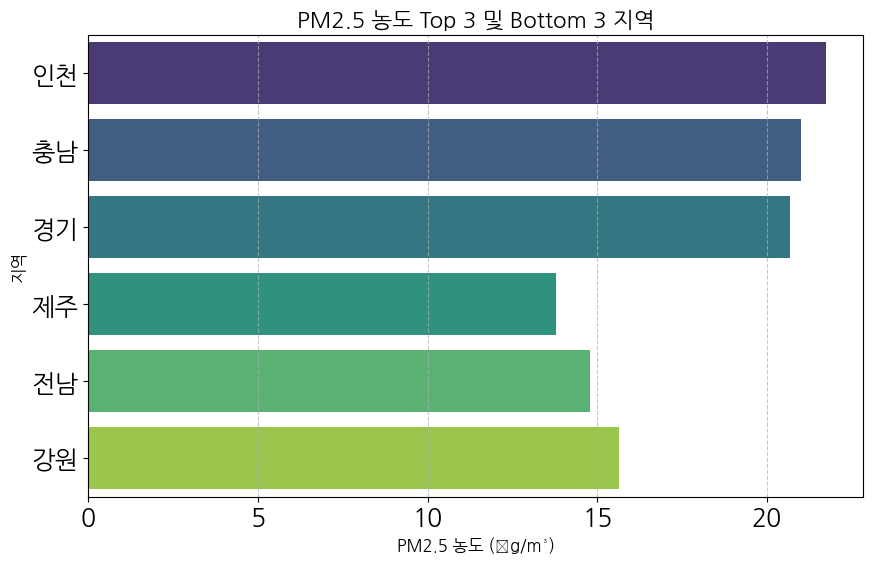

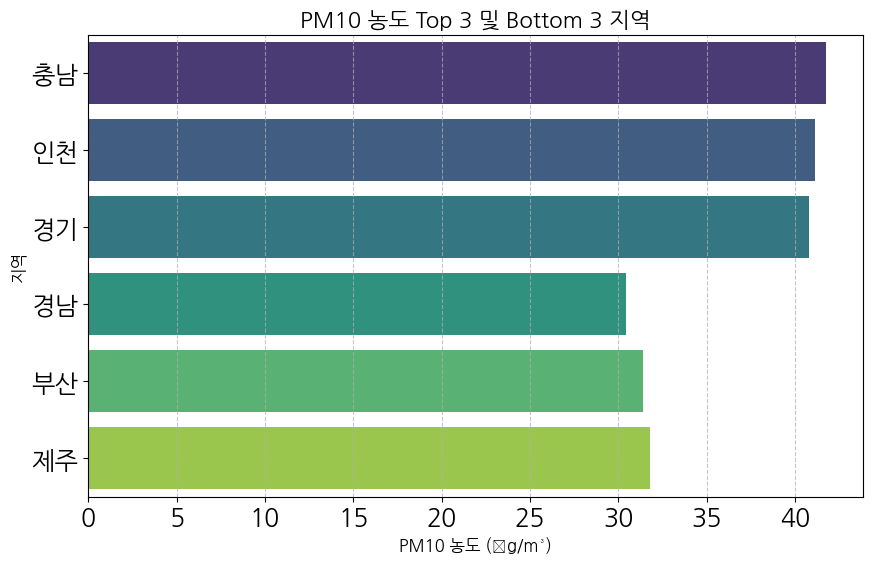

In [19]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# 연간 평균 미세먼지 농도 계산
yearly_avg_pm = df.groupby('지역')[['PM25', 'PM10']].mean()

# PM2.5 농도 Top 3 및 Bottom 3 지역
top3_pm25 = yearly_avg_pm['PM25'].nlargest(3)
bottom3_pm25 = yearly_avg_pm['PM25'].nsmallest(3)

# PM10 농도 Top 3 및 Bottom 3 지역
top3_pm10 = yearly_avg_pm['PM10'].nlargest(3)
bottom3_pm10 = yearly_avg_pm['PM10'].nsmallest(3)

# 시각화 함수 정의
def plot_top_bottom_pm(top3, bottom3, pm_type):
    # 데이터 합치기
    combined = pd.concat([top3, bottom3])

    # 시각화
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=combined.values,
        y=combined.index,
        palette="viridis",
        orient='h',
        legend = True
    )
    plt.title(f'{pm_type} 농도 Top 3 및 Bottom 3 지역', fontsize=16)
    plt.xlabel(f'{pm_type} 농도 (µg/m³)', fontsize=12)
    plt.ylabel('지역', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# PM2.5 시각화
plot_top_bottom_pm(top3_pm25, bottom3_pm25, 'PM2.5')

# PM10 시각화
plot_top_bottom_pm(top3_pm10, bottom3_pm10, 'PM10')

### 왜 이런 결과가 나왔을까?
발전소나 공장과 같은 '**점 오염원**', 자동차와 같은 '**이동 오염원**'의 경우 PM2.5에 미치는 영향이 더 크다.

황사의 경우 흙먼지이기 때문에 토양성분이 주를 이루고 PM10의 발생원이다.

즉, 충남, 인천, 경기의 경우에는 황사를 비롯해 '점 오염원', '이동 오염원'의 영향이 큰 지역이다.

충남의 다른 지표들은 어떨까?



### '점 오염원'과 관련하여 충남의 대기질 분석 (No2, PM25) with Scatterplot
- [데이터 구성 변수] 항목에서 서술했듯이 '점 오염원'에 관련된 대기오염물질 변수는 NO2, SO2, CO가 해당될 수 있다.
- 각각의 변수와 PM25의 상관 관계를 Scatterplot으로 시각화 해보았다.
- **분석 결과**
   - NO2 상관계수: 0.46, SO2 상관계수: 0.16, CO 상관계수: 0.51
   - **PM25간의 양의 상관관계에 가장 큰 영향을 미치는 변수는 CO**였고, 그 다음이 NO2였으며, 가장 적은 영향을 미치는 변수는 SO2였다.

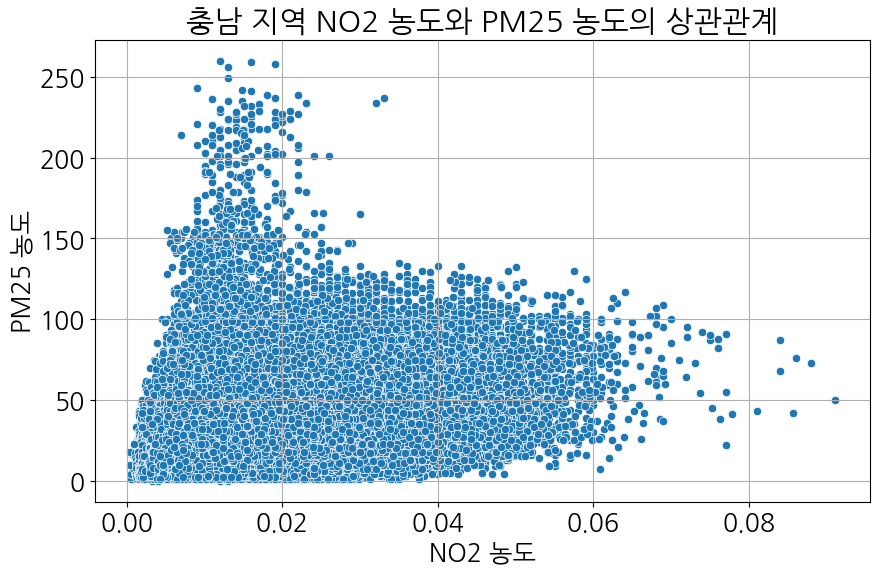

충남 지역 NO2와 PM25의 상관계수: 0.464027070702261


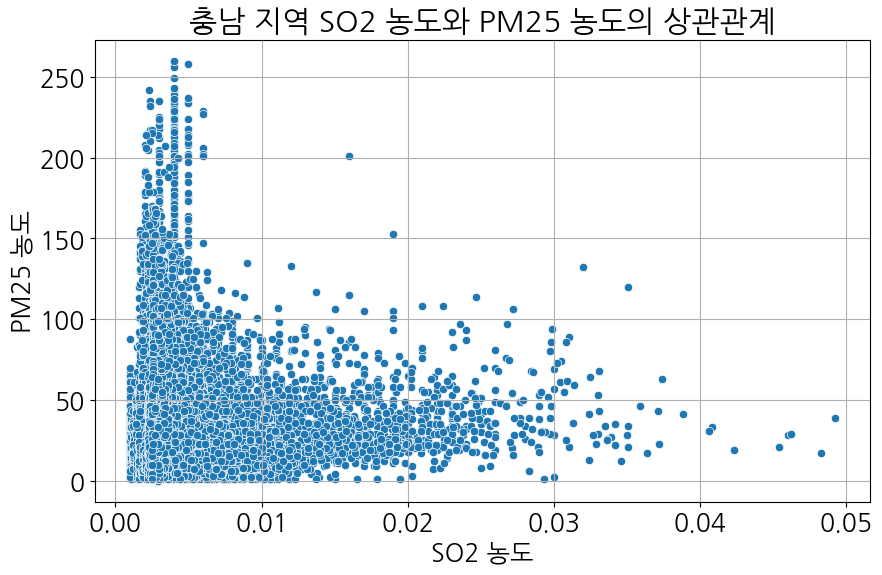

충남 지역 SO2와 PM25의 상관계수: 0.1662231603870793


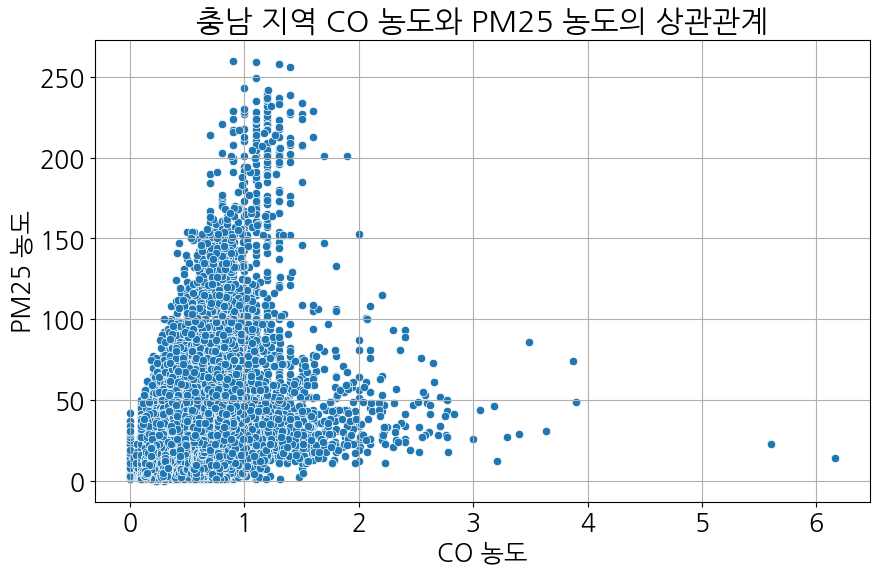

충남 지역 CO와 PM25의 상관계수: 0.518795097349029


In [20]:
# 충남 지역 데이터만 추출
chungnam_df = df[df['지역'] == '충남']

# NO2 - PM25 상관관계
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NO2', y='PM25', data=chungnam_df)
plt.title('충남 지역 NO2 농도와 PM25 농도의 상관관계')
plt.xlabel('NO2 농도')
plt.ylabel('PM25 농도')
plt.grid(True)
plt.show()
correlation = chungnam_df['NO2'].corr(chungnam_df['PM25'])
print(f"충남 지역 NO2와 PM25의 상관계수: {correlation}")

# SO2 - PM25 상관관계
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SO2', y='PM25', data=chungnam_df)
plt.title('충남 지역 SO2 농도와 PM25 농도의 상관관계')
plt.xlabel('SO2 농도')
plt.ylabel('PM25 농도')
plt.grid(True)
plt.show()
correlation = chungnam_df['SO2'].corr(chungnam_df['PM25'])
print(f"충남 지역 SO2와 PM25의 상관계수: {correlation}")

# CO - PM25 상관관계
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CO', y='PM25', data=chungnam_df)
plt.title('충남 지역 CO 농도와 PM25 농도의 상관관계')
plt.xlabel('CO 농도')
plt.ylabel('PM25 농도')
plt.grid(True)
plt.show()
correlation = chungnam_df['CO'].corr(chungnam_df['PM25'])
print(f"충남 지역 CO와 PM25의 상관계수: {correlation}")

### '이동 오염원'과 관련하여 서울의 대기질 분석 (PM25) with Scatterplot
- 한편 생활이동인구와 유동인구가 가장 많은 서울의 경우에는 어떨까? 이경우에는 '점 오염원'보다는 '이동 오염원'과 더 관련이 깊을 것으로 예상했다.
- **분석결과**
 - NO2 상관계수: 0.50, SO2 상관계수: 0.37, CO 상관계수: 0.65
 - 모든 지표에서 충남의 사례보다 더 높은 양의 상관 관계를 가지고 있었고, SO2의 경우에는 2배 이상 더 높은 결과가 나왔다.
 - (참고: 충남 NO2 상관계수: 0.46, SO2 상관계수: 0.16, CO 상관계수: 0.51)

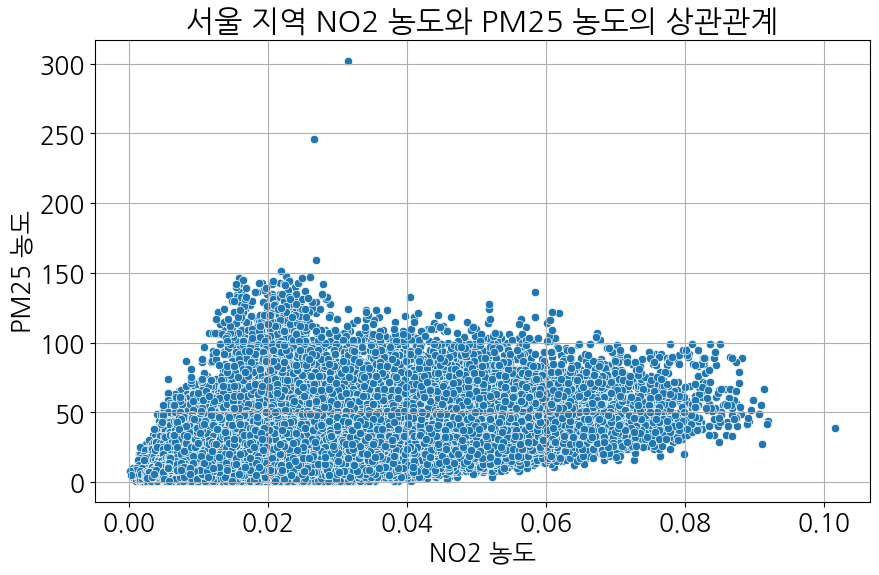

서울 지역 NO2와 PM25의 상관계수: 0.5001738197025568


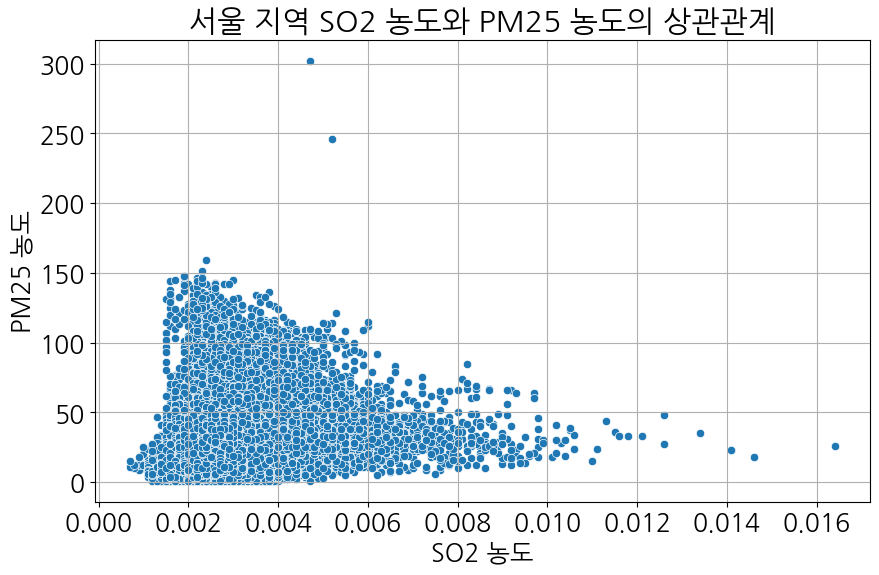

서울 지역 SO2와 PM25의 상관계수: 0.3731025908082145


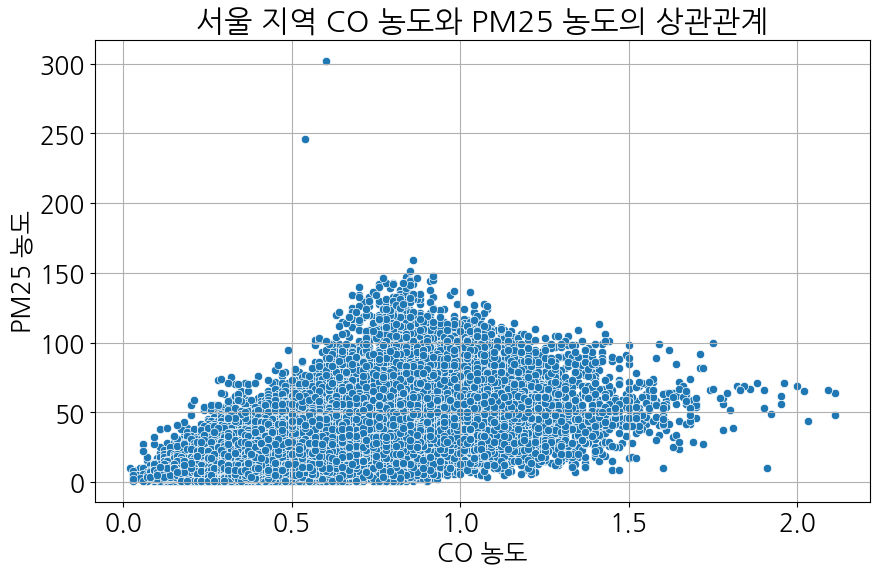

서울 지역 CO와 PM25의 상관계수: 0.6572413057425034


In [21]:
# 서울 지역 데이터만 추출
chungnam_df = df[df['지역'] == '서울']

# NO2 - PM25 상관관계
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NO2', y='PM25', data=chungnam_df)
plt.title('서울 지역 NO2 농도와 PM25 농도의 상관관계')
plt.xlabel('NO2 농도')
plt.ylabel('PM25 농도')
plt.grid(True)
plt.show()
correlation = chungnam_df['NO2'].corr(chungnam_df['PM25'])
print(f"서울 지역 NO2와 PM25의 상관계수: {correlation}")

# SO2 - PM25 상관관계
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SO2', y='PM25', data=chungnam_df)
plt.title('서울 지역 SO2 농도와 PM25 농도의 상관관계')
plt.xlabel('SO2 농도')
plt.ylabel('PM25 농도')
plt.grid(True)
plt.show()
correlation = chungnam_df['SO2'].corr(chungnam_df['PM25'])
print(f"서울 지역 SO2와 PM25의 상관계수: {correlation}")

# CO - PM25 상관관계
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CO', y='PM25', data=chungnam_df)
plt.title('서울 지역 CO 농도와 PM25 농도의 상관관계')
plt.xlabel('CO 농도')
plt.ylabel('PM25 농도')
plt.grid(True)
plt.show()
correlation = chungnam_df['CO'].corr(chungnam_df['PM25'])
print(f"서울 지역 CO와 PM25의 상관계수: {correlation}")

### 왜 이런 결과가 나왔을까?
서울은 교통량이 많아 자동차 배기가스가 주요 오염원이 된다. NO2와 CO는 PM2.5와 높은 상관관계를 가지고, SO2도 일정한 상관관계를 보인다.

반면 충남은 산업지구와 농업이 주요 오염원으로 작용한다. NO2의 상관관계는 0.46으로 서울보다 낮고, SO2는 0.16으로 매우 낮다. 이는 충남의 오염물질이 고정된 오염원에 의존하고 있기 때문이다.

결론적으로 서울은 이동오염원의 영향을 크게 받고, 충남은 산업과 농업에 의해 영향을 받는다.

한편, 충남의 미세먼지 농도는 서울보다 높다.이는 산업(공장지대)와 농업으로 인한 대기질(미세먼지) 오염이 교통으로 인한 오염보다 더 심한 영향을 준다고 해석할 수 있다.

(끝)